In [35]:
import pandas as pd
import numpy as np
# from google.colab import drive

In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# give path to the data.csv 
file_path = '/content/drive/My Drive/data.csv' 

As one may see, the csv file contains actual labels and the predicted probabilities from two ML model (random forest and logistic regression).

In [39]:
df = pd.read_csv(file_path)
df.head()


,y_act,y_pred_random_forest,y_pred_logistic
0,1,0.639816,0.531904
1,0,0.490993,0.414496
2,1,0.623815,0.569883
3,1,0.506616,0.443674
4,0,0.418302,0.369532


You have to take a threshold value and will have to predict final label. 
So add two new columns named as 'y_pred_rf'and 'y_pred_lr' in the df dataframe. These new columns will have final label predicted by the two models based on the threshold set.

In [40]:
thresh = 0.5
df['y_pred_rf'] = (df.y_pred_random_forest >= 0.5).astype('int')
df['y_pred_lr'] = (df.y_pred_logistic >= 0.5).astype('int')
df.head()

,y_act,y_pred_random_forest,y_pred_logistic,y_pred_rf,y_pred_lr
0,1,0.639816,0.531904,1,1
1,0,0.490993,0.414496,0,0
2,1,0.623815,0.569883,1,1
3,1,0.506616,0.443674,1,0
4,0,0.418302,0.369532,0,0


In [42]:
df.shape

(15758, 5)

Complete below function to compute true positive (tp), tn, fn, tn

In [43]:
def compute_tp_tn_fn_fp(y_act, y_pred):
  tp=tn=fp=fn=0
  for i in range(len(y_act)):
    if y_act[i] == 1:
      if y_pred[i]==0:
        fn += 1
      else:
        tp +=1
    else:
      if y_pred[i] ==1:
         fp +=1
      else:
        tn +=1
  return tp, tn, fp, fn

In [44]:
tp_lr, tn_lr, fp_lr, fn_lr = compute_tp_tn_fn_fp(df.y_act, df.y_pred_lr)
print('TP for Logistic Reg :', tp_lr)
print('TN for Logistic Reg :', tn_lr)
print('FP for Logistic Reg :', fp_lr)
print('FN for Logistic Reg :', fn_lr)

TP for Logistic Reg : 4279
TN for Logistic Reg : 5425
FP for Logistic Reg : 2454
FN for Logistic Reg : 3600


In [45]:
tp_rf, tn_rf, fp_rf, fn_rf = compute_tp_tn_fn_fp(df.y_act, df.y_pred_rf)
print('TP for Random Forest :', tp_rf)
print('TN for Random Forest :', tn_rf)
print('FP for Random Forest :', fp_rf)
print('FN for Random Forest :', fn_rf)

TP for Random Forest : 5047
TN for Random Forest : 5519
FP for Random Forest : 2360
FN for Random Forest : 2832


Let's verify result from sklearn

In [46]:
from sklearn.metrics import confusion_matrix
tn_rf1, fp_rf1, fn_rf1, tp_rf1 = confusion_matrix(df.y_act, df.y_pred_rf).ravel()

In [47]:
print('TP for Random Forest :', tp_rf1)
print('TN for Random Forest :', tn_rf1)
print('FP for Random Forest :', fp_rf1)
print('FN for Random Forest :', fn_rf1)

TP for Random Forest : 5047
TN for Random Forest : 5519
FP for Random Forest : 2360
FN for Random Forest : 2832


In a similar way complete all the functions below

In [48]:
def compute_accuracy(tp, tn, fn, fp):
  acc = ((tp +tn)/(tp+tn+fn+fp))
  return acc

In [49]:
print('Accuracy for Logistic Regression :', 100*compute_accuracy(tp_lr, tn_lr, fn_lr, fp_lr))#to get accuracy in percentage
print('Accuracy for Random Forest :', 100*compute_accuracy(tp_rf, tn_rf, fn_rf, fp_rf))

Accuracy for Logistic Regression : 61.58141896179718
Accuracy for Random Forest : 67.05165630156111


In [50]:
from sklearn.metrics import accuracy_score

In [51]:
print('Accuracy for Logistic Regression :', 100* accuracy_score(df.y_act, 
                                                           df.y_pred_lr))
print('Accuracy for Logistic Regression :', 100*accuracy_score(df.y_act, 
                                                           df.y_pred_rf))

Accuracy for Logistic Regression : 61.58141896179718
Accuracy for Logistic Regression : 67.05165630156111


In [52]:
def compute_precision(y_act,y_pred):
  tp,tn,fp,fn = compute_tp_tn_fn_fp(y_act,y_pred)  
  precision = tp/(tp+fp)
  return precision

In [53]:
print('Precision for Logistic Regression :', 100*compute_precision(df.y_act,df.y_pred_lr)) #to get precision in percentage
print('Precision for Random Forest :', 100*compute_precision(df.y_act,df.y_pred_rf))

Precision for Logistic Regression : 63.55265112134264
Precision for Random Forest : 68.1382476036182


In [54]:
from sklearn.metrics import precision_score
print('Precision for Logistic Regression :', 100* precision_score(df.y_act, 
                                                           df.y_pred_lr))
print('Precision for Random Forest :', 100* precision_score(df.y_act, 
                                                           df.y_pred_rf))

Precision for Logistic Regression : 63.55265112134264
Precision for Random Forest : 68.1382476036182


In [55]:
def compute_recall(y_act,y_pred):
  tp,tn,fp,fn = compute_tp_tn_fn_fp(y_act,y_pred)
  recall = (tp/(tp+fn))
  return recall 

In [56]:
print('Recall for Logistic Regression :', 100*compute_recall(df.y_act,df.y_pred_lr))#to get recall in percentage
print('Recall for Random Forest :', 100*compute_recall(df.y_act, df.y_pred_rf))

Recall for Logistic Regression : 54.30892245208783
Recall for Random Forest : 64.05635232897576


In [57]:
from sklearn.metrics import recall_score

print('Recall for Logistic Regression :', 100* recall_score(df.y_act, 
                                                           df.y_pred_lr))
print('Recall for Random Forest :', 100* recall_score(df.y_act, 
                                                           df.y_pred_rf))

Recall for Logistic Regression : 54.30892245208783
Recall for Random Forest : 64.05635232897576


In [58]:
def compute_f1_score(y_act,y_pred):
  p = compute_precision(y_act,y_pred)
  r = compute_recall(y_act,y_pred)
  f1_score = (2/((1/p)+(1/r)))
  return f1_score

In [59]:
print('F1 score for Logistic Regression :', compute_f1_score(df.y_act,
                                                             df.y_pred_lr))
print('F1 score for Random Forest :', compute_f1_score(df.y_act,df.y_pred_rf))

F1 score for Logistic Regression : 0.5856830002737476
F1 score for Random Forest : 0.6603427973308911


In [60]:
from sklearn.metrics import f1_score
print('F1 score for Logistic Regression :', f1_score(df.y_act, df.y_pred_lr))
print('F1 score for Random Forest :', f1_score(df.y_act, df.y_pred_rf))

F1 score for Logistic Regression : 0.5856830002737475
F1 score for Random Forest : 0.660342797330891


In [61]:
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

def getROCcurve(y_act,y_pred):
  fpr, tpr, threshold = metrics.roc_curve(y_act,y_pred)
  roc_auc = metrics.auc(fpr, tpr)
  
  plt.title('Receiver Operating Characteristic')
  plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],'r--')
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

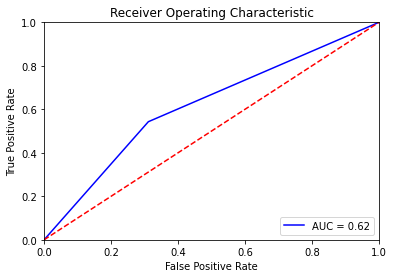

In [62]:
getROCcurve(df.y_act, df.y_pred_lr)

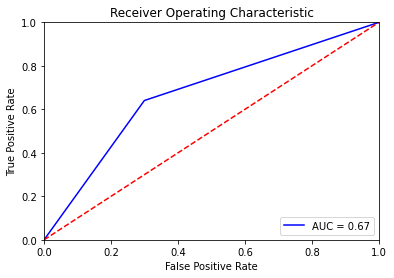

In [63]:
getROCcurve(df.y_act, df.y_pred_rf)